## Sarcasm Detection - NLP

Sarcasm is one of the most complex and nuanced uses of language. It is a form of communication that often changes the meaning of something by saying the opposite of what it means. In addition to expressing humor and criticism while establishing a social bond between people, sarcasm is perceived based on cultural context, tone, and context. However, in the field of natural language processing (NLP), sarcasm detection is quite difficult due to the multi-layered nature of language.

Traditional text analysis methods may be insufficient to capture subtle meanings such as sarcasm. For this reason, sarcasm detection has become an important topic in NLP research. Big data sources such as social media platforms, blogs, and online comments provide valuable ground for analyzing sarcastic expressions. When users' written expressions are examined with sentiment analysis and context-based methods, it allows the detection of sarcasm examples.

The aim of this project is to use machine learning and deep learning techniques to automatically detect sarcasm in texts. Data obtained from users' written expressions will be used in model training to understand the context of the language, thus making the detection of sarcasm more effective.

<img src='sarcasm.jpg' width=550 >

### Import Libraries

In [1]:
import nltk
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_json('Sarcasm.json', lines=True)
#Read the file.

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [5]:
df.shape

(26709, 3)

In [6]:
df=df[['headline','is_sarcastic']]
#We get the required columns

In [7]:
df.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

In [9]:
df['headline']=df['headline'].str.lower()
df['headline']=df['headline'].str.replace("[^\w\s]" , "",regex=True)
df['headline']=df['headline'].str.replace('[\n]', '',regex=True)
df['headline']=df['headline'].str.replace('\d+','',regex=True)
df['headline']=df['headline'].str.replace('\r',' ')

In [10]:
df['headline'][0]

'former versace store clerk sues over secret black code for minority shoppers'

In [11]:
df['is_sarcastic'].value_counts()

is_sarcastic
0    14985
1    11724
Name: count, dtype: int64

In [12]:
df['is_sarcastic']=df['is_sarcastic'].map({1:'Sarcasm', 0:'Not Sarcasm'})

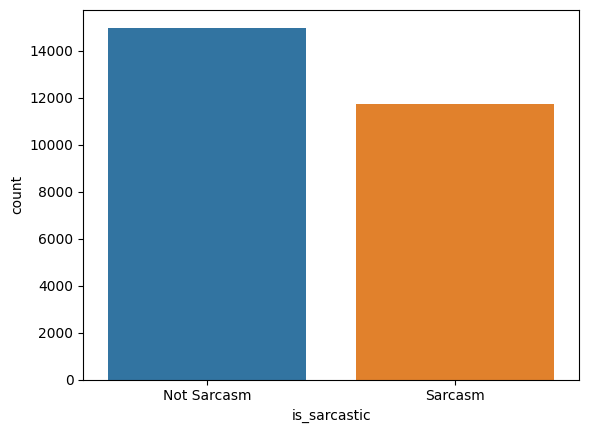

In [13]:
sns.countplot(x=df['is_sarcastic']);

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Separating Non-English Languages

In [15]:
#pip install langdetect

In [16]:
from langdetect import detect

In [17]:
df['lang']=df['headline'].apply(lambda x: detect(x))

In [18]:
df['lang'].value_counts()

lang
en    25400
fr      192
af      149
da      133
it      119
no      115
ca      113
nl      109
es       59
sv       49
ro       44
et       31
cy       29
pt       27
id       25
tl       24
so       13
de       13
lv       12
fi       10
sk        8
hr        7
pl        6
sl        6
sq        5
lt        4
cs        3
hu        2
tr        1
sw        1
Name: count, dtype: int64

In [19]:
df=df[df['lang'] == 'en']

In [20]:
df['lang'].unique()

array(['en'], dtype=object)

In [21]:
df.head()

,headline,is_sarcastic,lang
0,former versace store clerk sues over secret bl...,Not Sarcasm,en
1,the roseanne revival catches up to our thorny ...,Not Sarcasm,en
2,mom starting to fear sons web series closest t...,Sarcasm,en
3,boehner just wants wife to listen not come up ...,Sarcasm,en
4,jk rowling wishes snape happy birthday in the ...,Not Sarcasm,en


### WordCloud

In [22]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def wc(data,bgcolor):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

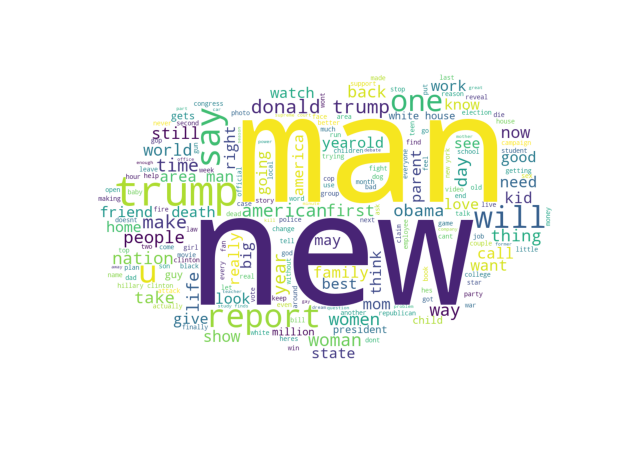

In [24]:
wc(df['headline'],'white')

### Polarity-Subjectivity

In [25]:
from textblob import TextBlob

In [26]:
df['polarity'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity']= df['headline'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [27]:
df.head()

,headline,is_sarcastic,lang,polarity,subjectivity
0,former versace store clerk sues over secret bl...,Not Sarcasm,en,-0.188889,0.377778
1,the roseanne revival catches up to our thorny ...,Not Sarcasm,en,0.033333,0.400000
2,mom starting to fear sons web series closest t...,Sarcasm,en,0.000000,0.100000
3,boehner just wants wife to listen not come up ...,Sarcasm,en,0.200000,0.100000
4,jk rowling wishes snape happy birthday in the ...,Not Sarcasm,en,0.600000,0.833333


### Removing Stop Words and Vectorizing

In [28]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [30]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [29]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [31]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

### Modelling

In [32]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
x=df['headline']
y=df['is_sarcastic']

In [34]:
x=vect.fit_transform(x)

In [35]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=42,test_size=.20)

In [36]:
b=BernoulliNB()
model=b.fit(x_train,y_train)

In [37]:
bpred=b.predict(x_test)
accuracy_score(bpred,y_test)

0.8452755905511811

In [38]:
print(classification_report(bpred, y_test))

              precision    recall  f1-score   support

 Not Sarcasm       0.88      0.85      0.87      2977
     Sarcasm       0.80      0.84      0.82      2103

    accuracy                           0.85      5080
   macro avg       0.84      0.84      0.84      5080
weighted avg       0.85      0.85      0.85      5080



In [39]:
confusion_matrix(bpred, y_test)

array([[2524,  453],
       [ 333, 1770]], dtype=int64)

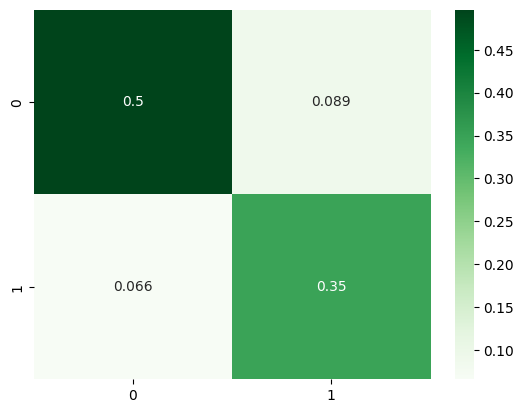

In [40]:
cm = confusion_matrix(bpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Greens');

In [41]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):
    
    lr = LogisticRegression(max_iter=1000)
    b = BernoulliNB()
    nb = MultinomialNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr,b, nb, knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression', 'BernoulliNB', 'MultinomialNB', 'K-Nearest Neighbors',
                  'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)
    
    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
        
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1
    
    
    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [42]:
algo_test(x,y)

,Accuracy,Precision,Recall,F1-score
SVM,0.848622,0.849312,0.848622,0.848836
MultinomialNB,0.846063,0.845815,0.846063,0.845656
BernoulliNB,0.845276,0.845130,0.845276,0.844721
Logistic Regression,0.843898,0.843631,0.843898,0.843664
Random Forest,0.815354,0.814922,0.815354,0.814854
MLP Classifier,0.810039,0.809710,0.810039,0.809810
Gradient Boosting,0.761024,0.777959,0.761024,0.761588
Decision Tree,0.756890,0.756201,0.756890,0.756379
AdaBoost,0.751378,0.751896,0.751378,0.747944
K-Nearest Neighbors,0.630315,0.654157,0.630315,0.583341


### AutoML with PyCaret

In [43]:
x=df['headline']
y=df['is_sarcastic']

In [44]:
from pycaret.classification import*

In [45]:
a=setup(data=df,target="is_sarcastic")

,Description,Value
0,Session id,996
1,Target,is_sarcastic
2,Target type,Binary
3,Target mapping,"Not Sarcasm: 0, Sarcasm: 1"
4,Original data shape,"(25400, 5)"
5,Transformed data shape,"(25400, 5)"
6,Transformed train set shape,"(17780, 5)"
7,Transformed test set shape,"(7620, 5)"
8,Numeric features,2
9,Categorical features,2


In [46]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5679,0.5089,0.5679,0.6919,0.4190,0.0142,0.0727,0.9030
lr,Logistic Regression,0.5659,0.5664,0.5659,0.7549,0.4124,0.0082,0.0632,0.5750
nb,Naive Bayes,0.5659,0.5037,0.5659,0.7549,0.4124,0.0082,0.0632,0.0690
dt,Decision Tree Classifier,0.5659,0.5037,0.5659,0.7549,0.4124,0.0082,0.0632,0.0680
svm,SVM - Linear Kernel,0.5659,0.5230,0.5659,0.7549,0.4124,0.0082,0.0632,0.0680
ridge,Ridge Classifier,0.5659,0.5677,0.5659,0.7549,0.4124,0.0082,0.0632,0.0740
rf,Random Forest Classifier,0.5659,0.5047,0.5659,0.7549,0.4124,0.0082,0.0632,0.1790
ada,Ada Boost Classifier,0.5659,0.5037,0.5659,0.7549,0.4124,0.0082,0.0632,0.0690
gbc,Gradient Boosting Classifier,0.5659,0.4937,0.5659,0.7549,0.4124,0.0082,0.0632,0.1480
lda,Linear Discriminant Analysis,0.5659,0.4574,0.5659,0.7549,0.4124,0.0082,0.0632,0.0760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [48]:
user = input("Enter a Text: ")
data = vect.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: Cows lose their jobs as milk prices drop
['Sarcasm']


### Summary

Sarcasm is a complex and multi-layered use of language, often changing the meaning of something by saying the opposite of what it means. Social media and online content provide valuable data sources for analyzing sarcastic expressions. In this project, we used Natural Language Processing (NLP) techniques to automatically detect sarcasm in text. We took the necessary columns, organized our data, and trained our model. We achieved an 84 percent success rate. Thus, we can detect whether sarcasm is present in the given text.